<h1><center> I. Preparation </center></h1>

In [1]:
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sc
import seaborn as sns
import statsmodels as sms
import statsmodels.api as sm
from IPython.core.display import HTML
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

sns.set_theme(rc={'grid.linewidth': 0.6, 'grid.color': 'white',
                  'axes.linewidth': 2, 'axes.facecolor': '#ECECEC', 
                  'axes.labelcolor': '#000000',
                  'xtick.color': '#000000', 'ytick.color': '#000000'})

my_palette_1 = ['#00575e', '#4bafb8', 'red']
my_palette_2 = ['#00575e', '#4bafb8']


def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

<p><div style = "text-align: justify; font-size: 14px">The first dataset used is the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">Iris flower dataset</a>, which is perfect for showcasing how to conduct basic statistical tests.</div></p>

In [2]:
df_iris = pd.read_csv('./0_Data/Iris.csv')

<p><div style = "text-align: justify; font-size: 14px">For conducting two-way ANOVA the <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">heart failure dataset</a> was utilised. It has more variables with intuitive categories making ANOVA results easier to understand.</div></p>

In [4]:
df_disease = pd.read_csv('./0_Data/heart_disease.csv')

<h1><center> II. Comparing mean values </center></h1>

## 1. One-Sample t-Test <a class="anchor" id = "II_1"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether an unknown population mean is different from a specific value.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">The observations are sampled independently of each other;</div>
* <div style = "font-size: 14px">A sample is ~ $N(μ,σ^2)$ or sufficiently large;</div>
* <div style = "font-size: 14px">$σ^2$ is unknown.</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – an unknown population mean is equal to a specific value: $μ = μ_0$.</div></p>

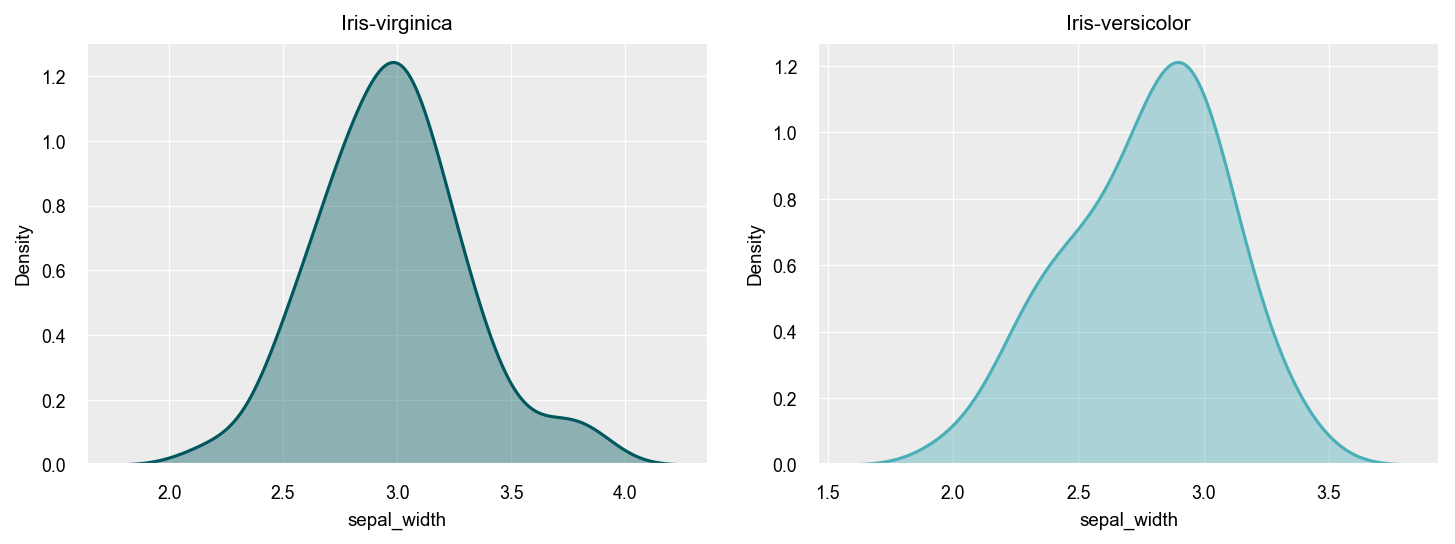

In [4]:
df_virginica = df_iris.loc[df_iris['species'] == 'Iris-virginica', ['sepal_width', 'species']]
df_versicolor = df_iris.loc[df_iris['species'] == 'Iris-versicolor', ['sepal_width', 'species']]

with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig_0, ax_0 = plt.subplots(2, 2, figsize=(10, 7))  # 2 by 2 grid - making graphs look neater
    
    sns.kdeplot(ax=ax_0[0, 0], x=df_virginica['sepal_width'], 
                common_norm=True, fill=True, alpha=0.4, color='#00575e',
                linewidth=1.5)
    
    ax_0[0, 0].set_title('Iris-virginica', fontsize=10, color='black')
    
    sns.kdeplot(ax=ax_0[0, 1], x=df_versicolor['sepal_width'], 
                common_norm=True, fill=True, alpha=0.4, color='#4bafb8',
                linewidth=1.5)
    
    ax_0[0, 1].set_title('Iris-versicolor', fontsize=10, color='black')
    
    ax_0[1, 0].set_visible(False)
    ax_0[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px"><b>1. Test and confidence interval</b> (sepal width, virginica):</div></p>

In [5]:
# Test

tt_1_0 = sc.ttest_1samp(s_width_virginica, 3, alternative = 'two-sided')

# CI

conf_lvl = 0.95
dfs = len(s_width_virginica) - 1
samp_mean = np.mean(s_width_virginica)
samp_std = np.std(s_width_virginica)

tt_1_ci_0 = sc.t.interval(confidence=conf_lvl, df=dfs, loc=samp_mean, scale=samp_std)

# Results

print(f' Theorised mean: {3}', '\n', 
      f'Sample mean: {round(samp_mean, 4)} |', f'Sample standard deviation: {round(samp_std, 4)}', '\n',
      f'Test statistic: {round(tt_1_0[0], 4)} |', f'p-value: {round(tt_1_0[1], 4)}', '\n',
      f'L boundary: {round(tt_1_ci_0[0], 4)} |', f'U boundary: {round(tt_1_ci_0[1], 4)}')

 Theorised mean: 3 
 Sample mean: 2.974 | Sample standard deviation: 0.3193 
 Test statistic: -0.5701 | p-value: 0.5712 
 L boundary: 2.3324 | U boundary: 3.6156


<p><div style = "text-align: justify; font-size: 14px"><b>2. Test and confidence interval</b> (sepal width, versicolor):</div></p>

In [6]:
# Test

tt_1_1 = sc.ttest_1samp(s_width_versicolor, 2.7, alternative = 'two-sided')

# CI

conf_lvl = 0.95
dfs = len(s_width_versicolor) - 1
samp_mean = np.mean(s_width_versicolor)
samp_std = np.std(s_width_versicolor)

tt_1_ci_1 = sc.t.interval(confidence=conf_lvl, df=dfs, loc=samp_mean, scale=samp_std)

# Results

print(f' Theorised mean: {2.7}', '\n', 
      f'Sample mean: {round(samp_mean, 4)} |', f'Sample standard deviation: {round(samp_std, 4)}', '\n',
      f'Test statistic: {round(tt_1_1[0], 4)} |', f'p-value: {round(tt_1_1[1], 4)}', '\n',
      f'L boundary: {round(tt_1_ci_1[0], 4)} |', f'U boundary: {round(tt_1_ci_1[1], 4)}')

 Theorised mean: 2.7 
 Sample mean: 2.77 | Sample standard deviation: 0.3106 
 Test statistic: 1.5774 | p-value: 0.1211 
 L boundary: 2.1457 | U boundary: 3.3943


<p><div style = "text-align: justify; font-size: 14px"><b>3. Power analysis</b>:</div></p>

* <div style = "font-size: 14px">Significance level: $α = 0.05$;</div>
* <div style = "font-size: 14px">Statistical power: $1 - β = 0.9$;</div>
* <div style = "font-size: 14px">Effect size: $\frac{\bar{x} - μ}{s} = 0.5$ (Standardized mean difference);</div>
* <div style = "font-size: 14px">Sample size: $n$ $=$ $?$ (yet to be determined).</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Note</b>: сhoose the smallest effect size that would be important to detect. Standardized mean difference is interpreted in the following way: the number of standard deviations that our sample mean $\bar{x}$ is away from the the population mean $μ$. </div></p>

In [7]:
power_a_0 = TTestPower()
n_obs_0 = power_a_0.solve_power(alpha=0.05, power=0.9, effect_size=0.5, nobs=None, 
                                alternative='two-sided')

print(f'Number of observations required: {round(n_obs_0, 0)}')

Number of observations required: 44.0


## 2. Two-Sample t-Test <a class="anchor" id = "II_2"></a>

### 2.1 Unpaired (independent) samples

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population means of 2 groups are equal or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are independent, and the observations within each sample are independent of each other;</div>
* <div style = "font-size: 14px">Samples are ~ $N(μ,σ^2)$ or sufficiently large;</div>
* <div style = "font-size: 14px">$σ_1^2$ and $σ_2^2$ are unknown and equal.</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the samples are drawn from populations with the same population means: $μ_1 = μ_2$.</div></p>

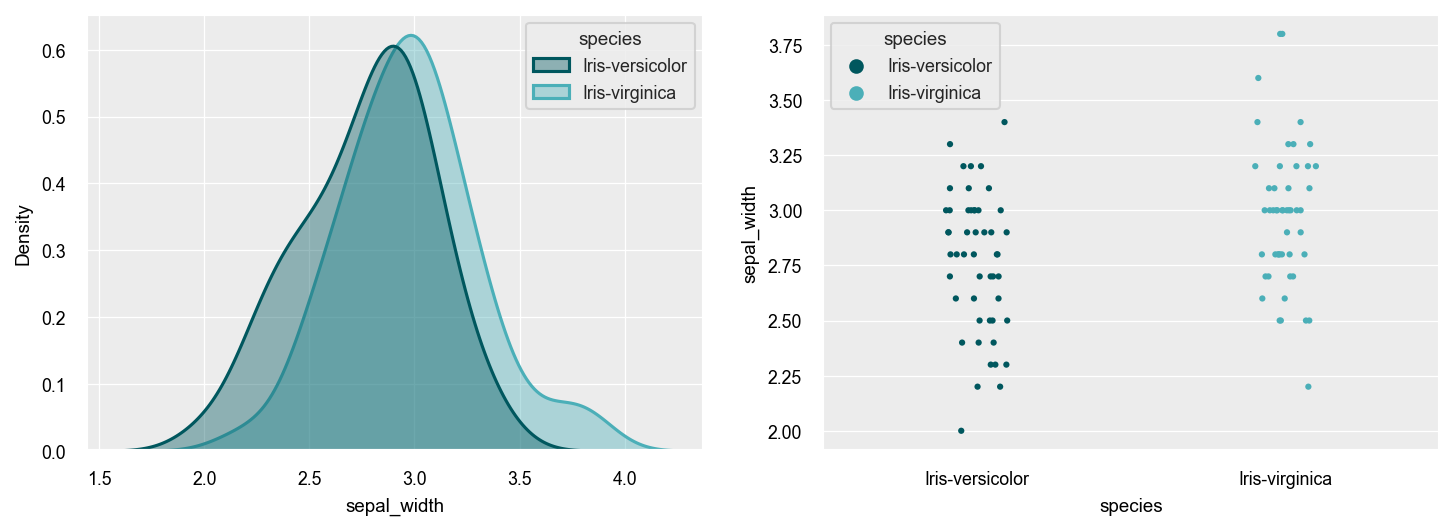

In [8]:
df_virg_vers = df_iris.loc[(df_iris['species'] == 'Iris-virginica') | 
                           (df_iris['species'] == 'Iris-versicolor'), ['sepal_width', 'species']]

with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize=(10, 7))  # 2 by 2 grid - making graphs look neater
    
    sns.kdeplot(ax=ax[0, 0], x = df_virg_vers['sepal_width'], 
                hue=df_virg_vers['species'], common_norm=True, linewidth=1.5,
                fill=True, alpha=0.4, palette=my_palette_2)
    
    sns.stripplot(ax=ax[0, 1], x=df_virg_vers['species'], s=3, jitter=0.1,
                  y=df_virg_vers['sepal_width'], hue=df_virg_vers['species'], 
                  palette=my_palette_2, alpha=1)
    
    ax[1, 0].set_visible(False)
    ax[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px"><b>1. Test and confidence interval</b>:</div></p>

In [9]:
# Test

tt_2_0 = sc.ttest_ind(s_width_versicolor, s_width_virginica, equal_var=True, alternative='two-sided')

# CI

CM = CompareMeans(DescrStatsW(s_width_versicolor), DescrStatsW(s_width_virginica))
tt_2_ci_0 = CM.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='pooled')

# Results

print(f' Sample mean №1: {round(np.mean(s_width_versicolor), 4)} |', 
      f'Sample mean №2: {round(np.mean(s_width_virginica), 4)}', '\n',
      f'Sample standard deviation №1: {round(np.std(s_width_versicolor), 4)} |', 
      f'Sample standard deviation №2: {round(np.std(s_width_virginica), 4)}', '\n',
      f'Test statistic: {round(tt_2_0[0], 4)} |', f'p-value: {round(tt_2_0[1], 4)}', '\n',
      f'L boundary: {round(tt_2_ci_0[0], 4)} |', f'U boundary: {round(tt_2_ci_0[1], 4)}')

 Sample mean №1: 2.77 | Sample mean №2: 2.974 
 Sample standard deviation №1: 0.3106 | Sample standard deviation №2: 0.3193 
 Test statistic: -3.2058 | p-value: 0.0018 
 L boundary: -0.3303 | U boundary: -0.0777


<p><div style = "text-align: justify; font-size: 14px"><b>2. Power analysis</b>:</div></p>

* <div style = "font-size: 14px">Significance level: $α = 0.05$;</div>
* <div style = "font-size: 14px">Statistical power: $1 - β = 0.9$;</div>
* <div style = "font-size: 14px">Effect size: $\frac{\bar{x}_1 - \bar{x}_2}{s_{pooled}} = 0.9$ (Cohen’s d);</div>
* <div style = "font-size: 14px">Sample size: $n$ $=$ $?$ (yet to be determined).</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Note</b>: сhoose the smallest effect size that would be important to detect. Cohen’s d is interpreted in the following way: the number of standard deviations that our sample means $\bar{x}_1$ and $\bar{x}_2$ are away from each other. </div></p>

In [10]:
power_a_1 = TTestIndPower()
n_obs_1 = power_a_1.solve_power(alpha=0.05, power=0.9, effect_size=0.9, nobs1=None, 
                                ratio=1.0, alternative='two-sided')

print(f'Number of observations required: {round(n_obs_1, 0)}')

Number of observations required: 27.0


### 2.2 Paired (dependent) samples

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the mean difference between paired (matched) units is zero or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">The observations within each sample are independent of each other, whereas samples are dependent (paired);</div>
* <div style = "font-size: 14px">The difference is ~ $N(μ,σ^2)$ or we have a sufficiently large sample size.</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the population mean of the differences is zero: $μ_d = 0$.</div></p>

In [11]:
df_iris_paired = df_iris[['sepal_width']]
df_iris_paired = df_iris_paired.rename(columns = {'sepal_width': 'sepal_width_before'})
df_iris_paired['sepal_width_after'] = df_iris_paired['sepal_width_before'] + (np.random.normal(size=150) + 0.2)
df_iris_paired['difference'] = df_iris_paired['sepal_width_before'] - df_iris_paired['sepal_width_after']

df_iris_paired.round(1).head(4)

,sepal_width_before,sepal_width_after,difference
0,3.5,4.4,-0.9
1,3.0,0.7,2.3
2,3.2,4.2,-1.0
3,3.1,3.2,-0.1


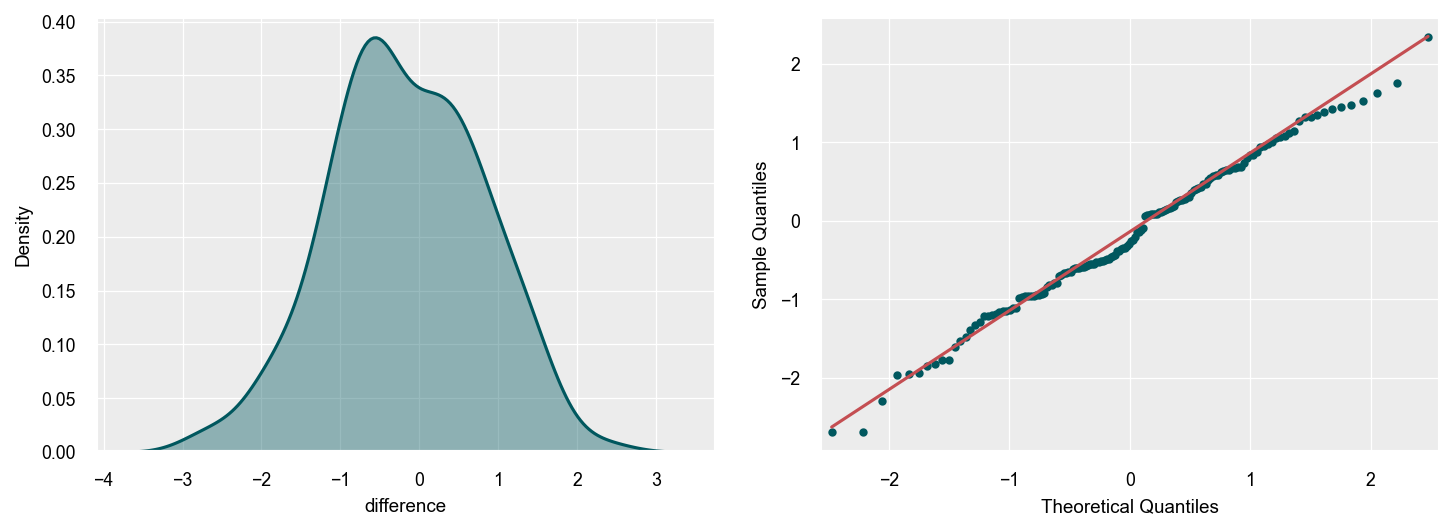

In [12]:
with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize=(10, 7))  # 2 by 2 grid - making graphs look neater
    
    sns.kdeplot(ax=ax[0, 0], x=df_iris_paired['difference'],
                color='#00575e', fill=True, alpha=0.4, linewidth=1.5)
    
    sm.qqplot(df_iris_paired['difference'], line='q', ax=ax[0, 1], 
              markerfacecolor='#00575e', markeredgecolor='#00575e', markersize=3)
    
    ax[1, 0].set_visible(False)
    ax[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

In [13]:
x_before = df_iris_paired['sepal_width_before']
x_after = df_iris_paired['sepal_width_after']

<p><div style = "text-align: justify; font-size: 14px"><b>Test and confidence interval</b>:</div></p>

In [14]:
# Test

tt_1_r_0 = sc.ttest_rel(x_before, x_after, alternative='two-sided')

# CI

conf_lvl = 0.95
dfs = len(x_before) - 1
samp_mean = np.mean(x_before - x_after)
samp_std = np.std(x_before - x_after)

tt_1_r_ci_0 = sc.t.interval(confidence=conf_lvl, df=dfs, loc=samp_mean, scale=samp_std)

# Results

print(f' Mean difference: {round(np.mean(x_before - x_after), 4)}', '\n',
      f'Test statistic: {round(tt_1_r_0[0], 4)} |', f'p-value: {round(tt_1_r_0[1], 4)}', '\n',
      f'L boundary: {round(tt_1_r_ci_0[0], 4)} |', f'U boundary: {round(tt_1_r_ci_0[1], 4)}')

 Mean difference: -0.1797 
 Test statistic: -2.2989 | p-value: 0.0229 
 L boundary: -2.0647 | U boundary: 1.7054


## 3. Welch’s t-test  (unequal variances) <a class="anchor" id = "II_3"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population means of 2 groups are equal or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are independent, and the observations within each sample are independent of each other;</div>
* <div style = "font-size: 14px">Samples are ~ $N(μ,σ^2)$ or sufficiently large;</div>
* <div style = "font-size: 14px">$σ_1^2$ and $σ_2^2$ are unknown and not equal.</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the samples are drawn from populations with the same population means: $μ_1 = μ_2$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Test and confidence interval</b>:</div></p>

In [15]:
# Test

tt_2_1 = sc.ttest_ind(s_width_versicolor, s_width_virginica, equal_var=False, alternative='two-sided')

# CI

CM = CompareMeans(DescrStatsW(s_width_versicolor), DescrStatsW(s_width_virginica))
tt_2_ci_1 = CM.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')

# Results

print(f' Mean difference: {round(np.mean(s_width_versicolor) - np.mean(s_width_virginica), 3)}', '\n',
      f'Test statistic: {round(tt_2_1[0], 4)} |', f'p-value: {round(tt_2_1[1], 4)}', '\n',
      f'L boundary: {round(tt_2_ci_1[0], 4)} |', f'U boundary: {round(tt_2_ci_1[1], 4)}')

 Mean difference: -0.204 
 Test statistic: -3.2058 | p-value: 0.0018 
 L boundary: -0.3303 | U boundary: -0.0777


## 4. One-Way ANOVA <a class="anchor" id = "II_4"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population means of $n$ groups are equal or not. We have one independent variable and one dependent.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are independent, and the observations within each sample are independent of each other;</div>
* <div style = "font-size: 14px">Samples are ~ $N(μ,σ^2)$ or sufficiently large;</div>
* <div style = "font-size: 14px">The variance among the samples should be approximately equal – the property of homogeneity.</div>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – there is no significant difference among the groups: $μ_1 = μ_2 = $ ... $ = μ_n$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Note</b>: ideally, sample sizes for each factor level should be (roughly) equal. Otherwise, it may affect the robustness of the homogeneity (homoscedasticity) assumption.</div></p>

In [16]:
df_iris.groupby(['species'])['sepal_length'].aggregate([np.mean, np.std, pd.Series.count]).reset_index()

,species,mean,std,count
0,Iris-setosa,5.006,0.352490,50
1,Iris-versicolor,5.936,0.516171,50
2,Iris-virginica,6.588,0.635880,50


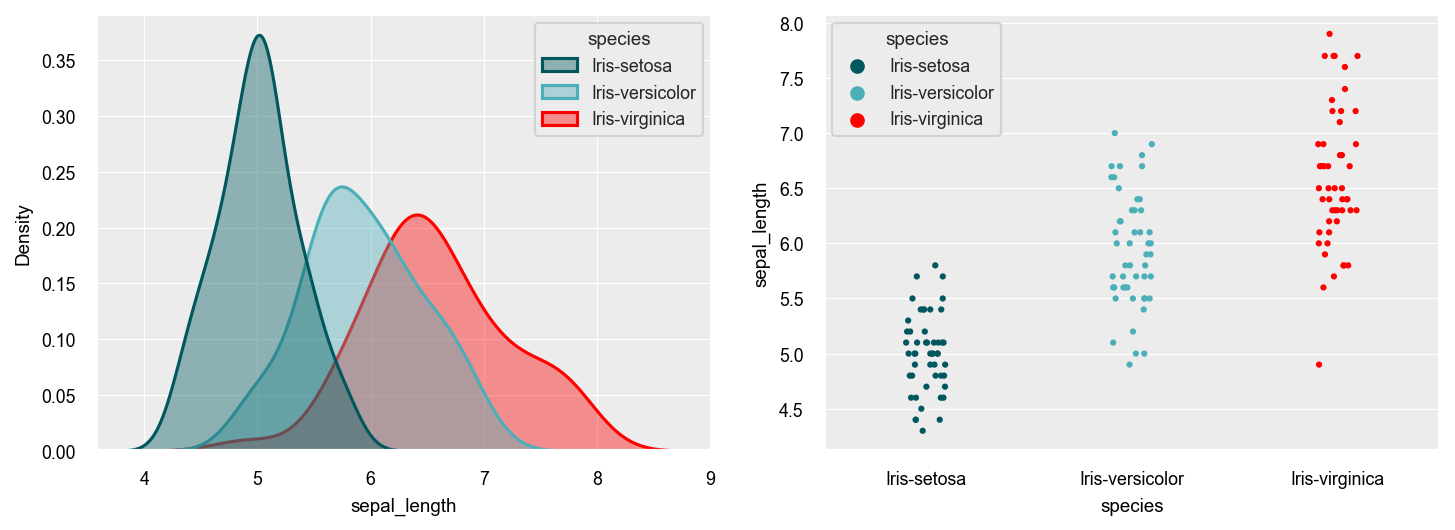

In [17]:
with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize = (10, 7)) # 2 by 2 grid - making graphs look neater
    
    sns.kdeplot(ax=ax[0, 0], x=df_iris['sepal_length'], linewidth=1.5,
                hue=df_iris['species'], common_norm=True,
                fill=True, alpha=0.4, palette=my_palette_1)
    
    sns.stripplot(ax=ax[0, 1], x=df_iris['species'], s=3, jitter=0.1,
                  y=df_iris['sepal_length'], hue=df_iris['species'],
                  palette=my_palette_1, alpha=1)
    
    ax[1, 0].set_visible(False)
    ax[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

In [18]:
model_1 = ols('sepal_length ~ species', data=df_iris).fit()
sm.stats.anova_lm(model_1).round(5)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,63.21213,31.60607,119.2645,0.0
Residual,147.0,38.95620,0.26501,NaN,NaN


<p><div style = "text-align: justify; font-size: 14px"><b>Figuring out what groups are different</b>: to do so, you need to conduct some post-hoc tests, controlling for the type I error.</div></p>

In [19]:
print(pairwise_tukeyhsd(endog=df_iris['sepal_length'], groups=df_iris['species'], alpha=0.05))

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
     group1          group2     meandiff p-adj lower  upper  reject
-------------------------------------------------------------------
    Iris-setosa Iris-versicolor     0.93   0.0 0.6862 1.1738   True
    Iris-setosa  Iris-virginica    1.582   0.0 1.3382 1.8258   True
Iris-versicolor  Iris-virginica    0.652   0.0 0.4082 0.8958   True
-------------------------------------------------------------------


## 5. Two-way ANOVA <a class="anchor" id = "II_5"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: used to examine how 2 independent variables affect one dependent. It also allows to determine the presence of an interaction term.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>ANOVA types</b>:</div></p>

* <div style = "font-size: 14px"><b>Type I</b>: $SS(A)$, $SS(B | A)$, $SS(AB | B, A)$;</div>
* <div style = "font-size: 14px"><b>Type II</b>: $SS(A | B)$, $SS(B | A)$. Thus, no significant interaction is assumed;</div>
* <div style = "font-size: 14px"><b>Type III</b>: $SS(A | B, AB)$, $SS(B | A, AB)$. Thus, a significant interaction is assumed.</div>

<p><div style = "text-align: justify; font-size: 14px">Since statsmodels library estimates $ SS(AB)$ using the same logic for all 3 types, we need to choose what method to use based on the significance of an interaction term.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Step-by-step analysis</b>:</div></p>

* <div style = "font-size: 14px">Fit a model with an interaction term;</div>
* <div style = "text-align: justify; font-size: 14px">Determine whether an interaction is important or not. Note, it can be statistically significant yet unimportant and statistically insignificant yet important. As in any reasonable regression model, using statistical significance for feature selection (especially solely) is, by and large, not a good practice. You should rely on plots, $CV$ errors, out-of-sample errors and $AIC$ to make a sound decision about importance of an interaction term;</div>
* <div style = "font-size: 14px">If an interaction is unimportant, we can start analysing main effects;</div>
* <div style = "text-align: justify; font-size: 14px">If an interaction is essential, we need to determine its type: <span style="color:#0049d1">ordinal</span> (<span style="color:#0049d1">simple</span>) – lines on the interaction plot don't cross; <span style="color:#0049d1">disordinal</span> (<span style="color:#0049d1">complex</span>) – lines do cross;</div>
* <div style = "text-align: justify; font-size: 14px">If an <span style="color:#0049d1">ordinal</span> interaction is present, we can still interpret main effects. On the other hand, a <span style="color:#0049d1">disordinal</span> interaction does not allow us to do so;</div>
* <div style = "text-align: justify; font-size: 14px">For two-way ANOVA always plot main effects and an interaction. Ideally, lines connecting mean values should be parallel for an interaction to be unimportant. Nevertheless, reasonably small departures from this "ideal" state will not make main effects uninterpretable.</div>

<p><div style = "text-align: justify; font-size: 14px">To make our analysis easier, we can start by creating some tables and plots to explore mean values, variances and the number of samples amongst groups:</div></p>

In [20]:
A = df_disease.groupby(['RestingECG'])['Age'].aggregate([np.mean, np.std, pd.Series.count]).reset_index()
B = df_disease.groupby(['HeartDisease'])['Age'].aggregate([np.mean, np.std, pd.Series.count]).reset_index()
C = df_disease.groupby(['RestingECG', 'HeartDisease'])['Age'].aggregate([np.mean, np.std, pd.Series.count]).reset_index()
D = pd.pivot_table(C, index=['RestingECG'], columns=['HeartDisease'], values='mean').reset_index()
D.columns.name = None

In [21]:
display(multi_table([A.round(2), B.round(2)]), multi_table([C.round(2), D.round(2)]))

,RestingECG,mean,std,count
0,LVH,56.22,8.86,188
1,Normal,51.74,9.36,552
2,ST,56.14,8.99,178
,HeartDisease,mean,std,count
0,healthy,50.55,9.44,410
1,ill,55.90,8.73,508


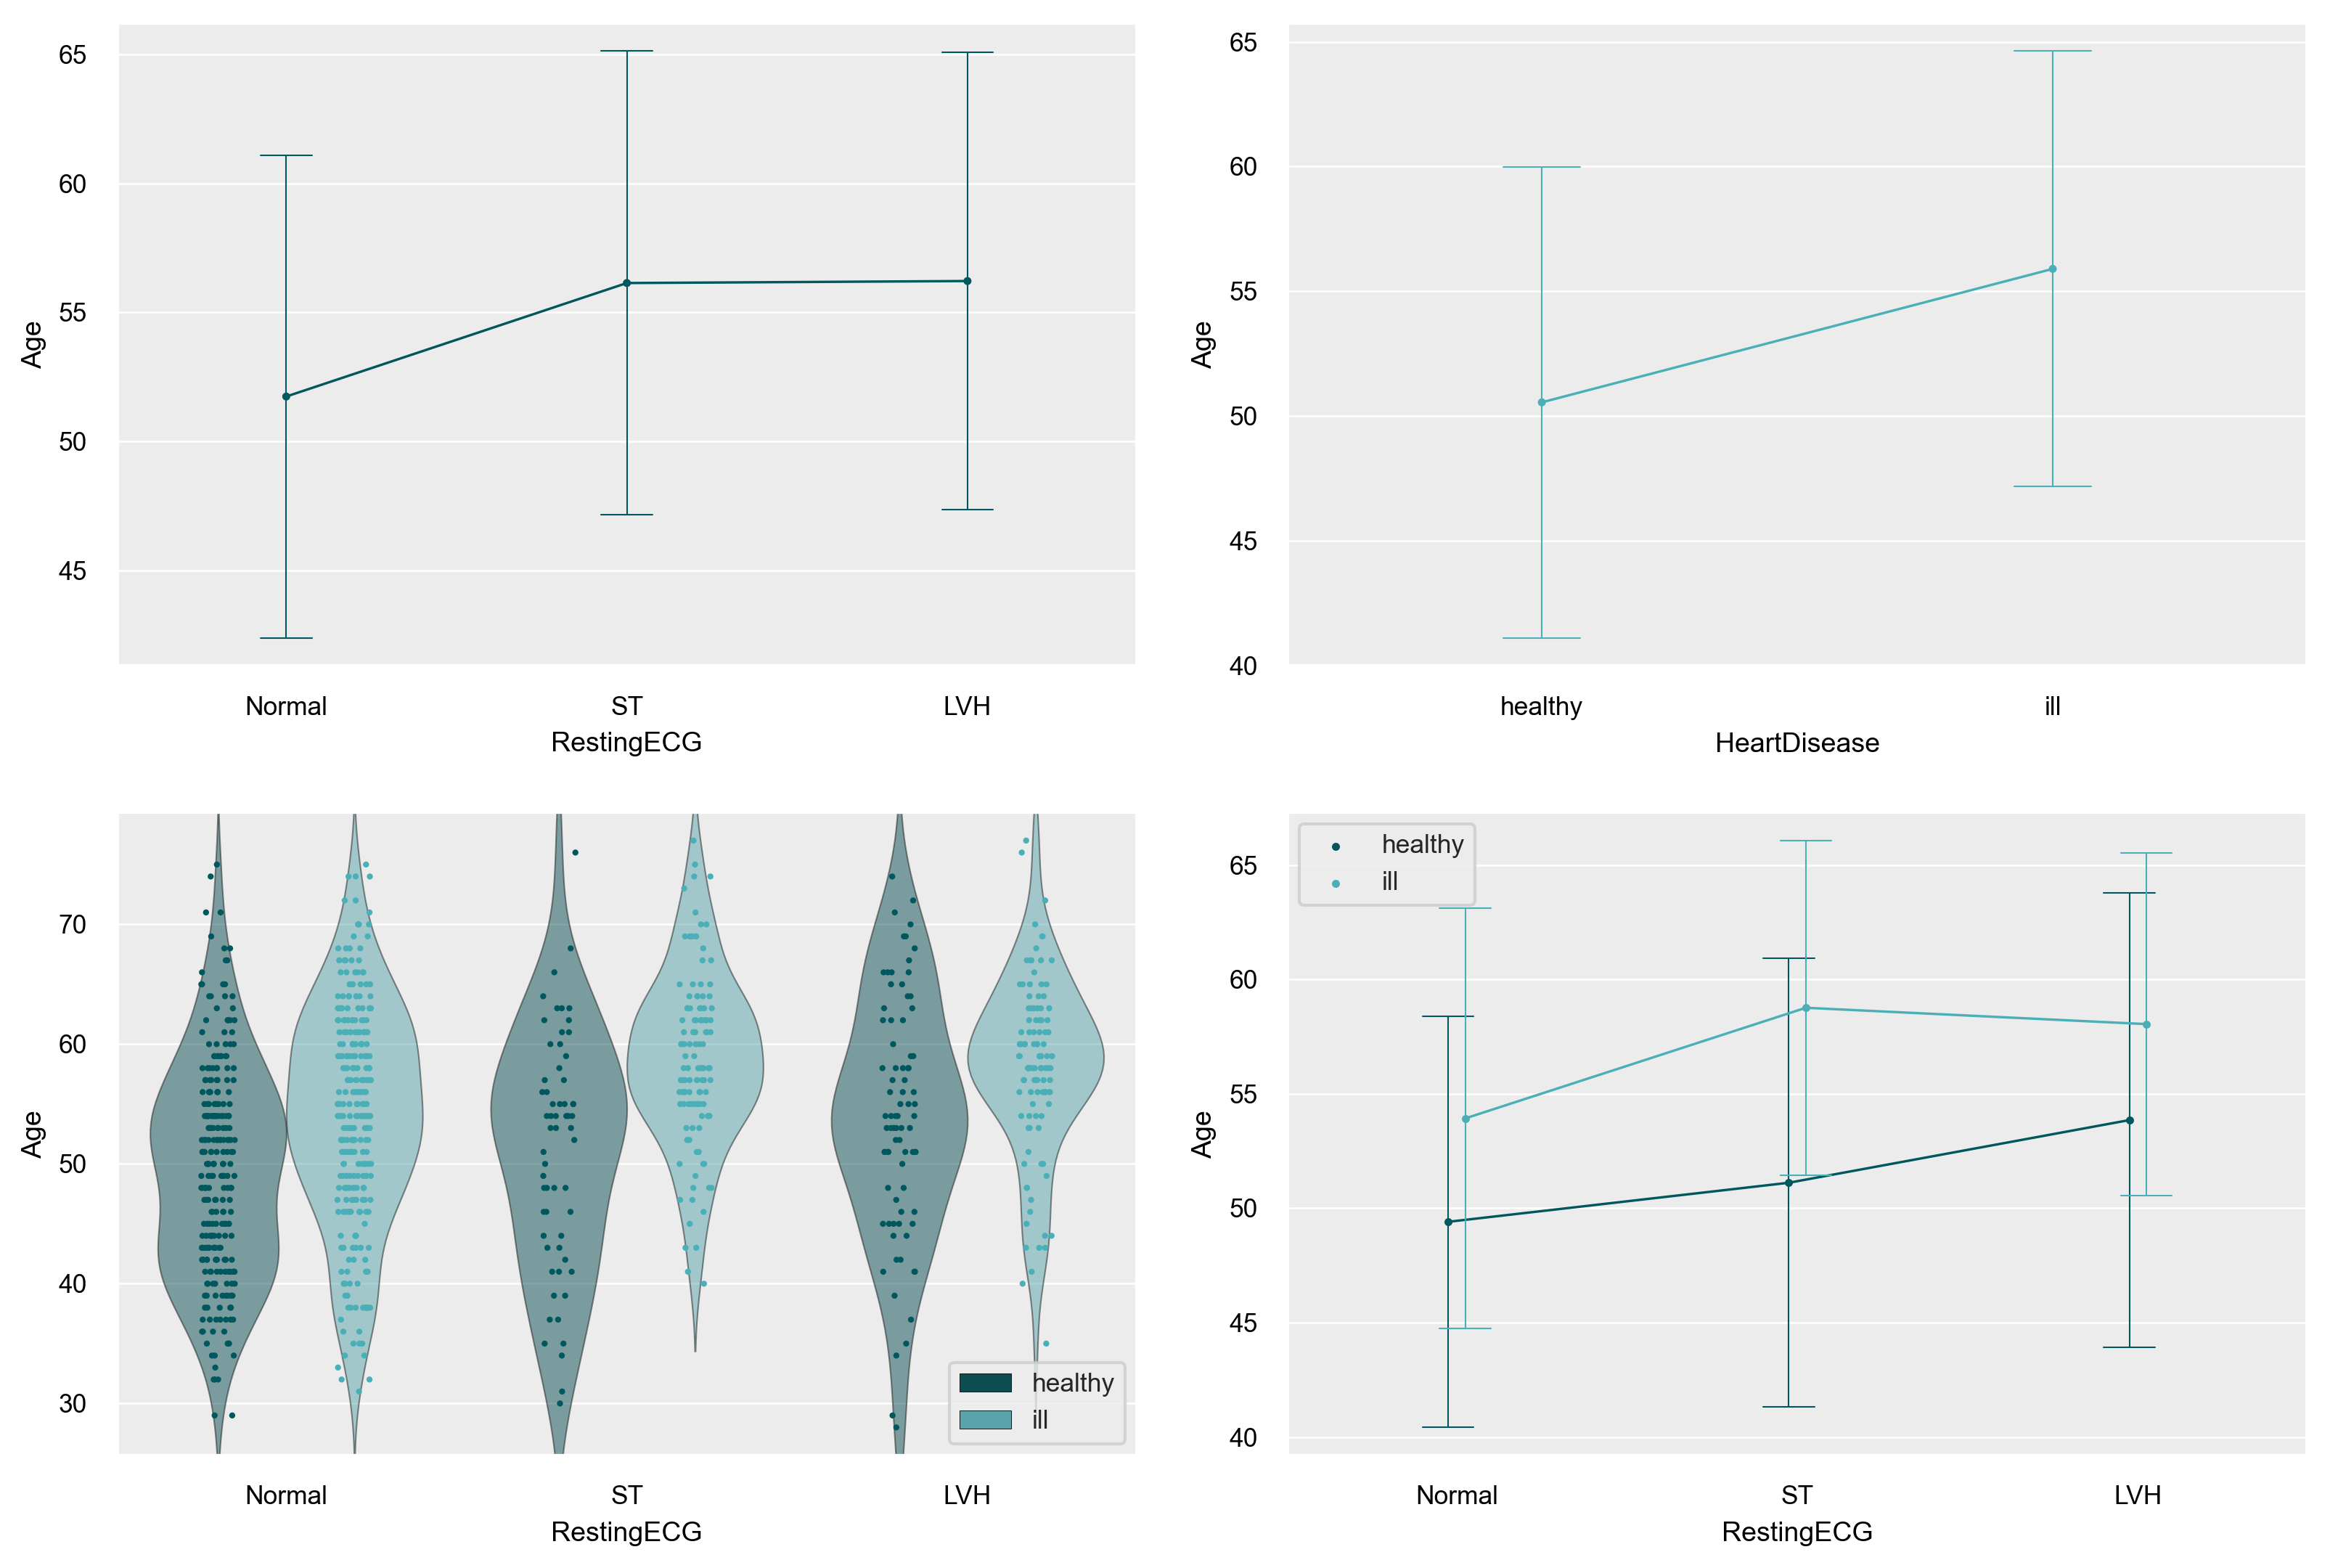

In [22]:
def legend_without_duplicate_labels(ax):
    handles, labels=ax.get_legend_handles_labels()
    unique=[(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize=(11, 7.5))
    
    # Graph 1
    
    sns.pointplot(ax=ax[0, 0], x=df_disease['RestingECG'], y=df_disease['Age'],
                  color='#00575e', estimator=np.mean, errorbar='sd', scale=0.3,
                  errwidth=0.5, capsize=0.15, join=True)
    
    # Graph 2
    
    sns.pointplot(ax=ax[0, 1], x=df_disease['HeartDisease'], y=df_disease['Age'],
                  color='#4bafb8', estimator=np.mean, errorbar='sd', scale=0.3,
                  errwidth=0.5, capsize=0.15, join=True)
    
    # Graph 3
    
    sns.violinplot(ax=ax[1, 0], y=df_disease['Age'], x=df_disease['RestingECG'],
                   hue=df_disease['HeartDisease'], palette=my_palette_2, scale='width',
                   linewidth=0.5, inner=None)
    
    plt.setp(ax[1, 0].collections, alpha=0.5)
        
    sns.stripplot(ax=ax[1, 0], y=df_disease['Age'], x=df_disease['RestingECG'],
                  hue=df_disease['HeartDisease'], palette=my_palette_2, 
                  alpha=1, s=2, jitter=0.1, dodge=True)
    
    legend_without_duplicate_labels(ax[1, 0])
    
    # Graph 4
    
    sns.pointplot(ax=ax[1, 1], x=df_disease['RestingECG'], y=df_disease['Age'],
                  hue=df_disease['HeartDisease'], palette=my_palette_2,
                  estimator=np.mean, errorbar='sd', scale=0.3,
                  errwidth=0.5, capsize=0.15, join=True, dodge=True)
    
    ax[1, 1].legend(loc='upper left')
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px"><b>Summary</b>:</div></p>

* <div style = "font-size: 14px">It can be seen that the main effects were quite apparent;</div>
* <div style = "font-size: 14px">Groups were unbalanced but the variance did not differ drastically;</div>
* <div style = "font-size: 14px">The interaction was <span style="color:#0049d1">ordinal</span>, and, at first glance, barely important.</div>

In [23]:
df_disease['Age_2'] = df_disease.groupby(['RestingECG'])['Age'].transform(np.mean)


def multiply(idx, x):
    if idx < 459: return x*0.97
    else: return x*1.03


df_disease['Age_2'] = [multiply(idx, x) for idx, x in zip(df_disease['Age_2'].index, df_disease['Age_2'])]
# df_disease['Age_2'] += (np.random.normal(size = len(df_disease))) * 0.5
df_disease['Age_2'] += [random.uniform(0, 6) for x in range(0, len(df_disease))]

df_disease['HeartDisease_2'] = np.where(df_disease.index < 459, 'healthy', 'ill')

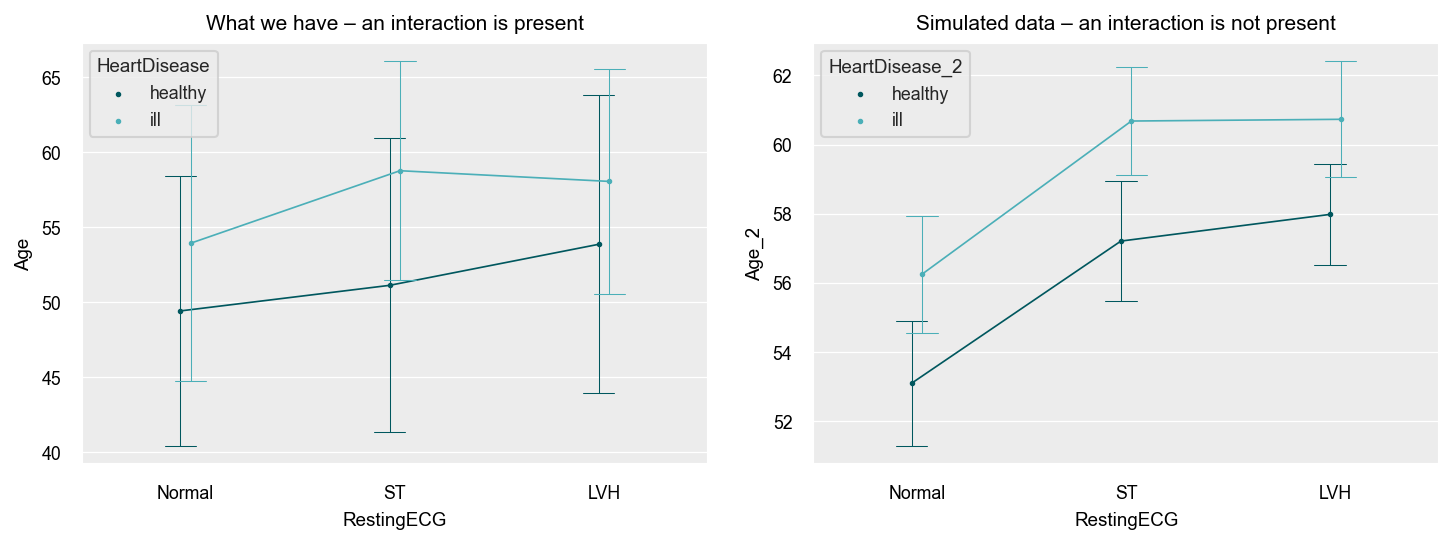

In [24]:
with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize=(10, 7))  # 2 by 2 grid - making graphs look neater
    
    # Graph 1
    
    sns.pointplot(ax=ax[0, 0], x=df_disease['RestingECG'], y=df_disease['Age'],
                  hue=df_disease['HeartDisease'], palette=my_palette_1,
                  estimator=np.mean, errorbar='sd', scale=0.3,
                  errwidth=0.5, capsize=0.15, join=True, dodge=True)
    
    ax[0, 0].set_title('What we have – an interaction is present', fontsize=10, color='black')
    
    # Graph 2
    
    sns.pointplot(ax=ax[0, 1], x=df_disease['RestingECG'], y=df_disease['Age_2'],
                  hue=df_disease['HeartDisease_2'], palette=my_palette_1,
                  estimator=np.mean, errorbar='sd', scale=0.3,
                  errwidth=0.5, capsize=0.15, join=True, dodge=True)
    
    ax[0, 1].set_title('Simulated data – an interaction is not present', fontsize=10, color='black')
    
    ax[1, 0].set_visible(False)
    ax[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">So, if an interaction is insignificant, we would get a plot similar to the 2nd graph: main effects are clearly distinguishable, being preserved even after plotting 2 categorical variables at once.</div></p>

<p><div style = "text-align: justify; font-size: 14px">Out of all possible options, I opted for $AIC$ to access the importance of an interaction term:</div></p>

In [25]:
model_1 = ols('Age ~ RestingECG', data=df_disease).fit()  # var 1
model_2 = ols('Age ~ HeartDisease', data=df_disease).fit()  # var 2
model_3 = ols('Age ~ HeartDisease + RestingECG', data=df_disease).fit()  # var 1 + 2
model_4 = ols('Age ~ HeartDisease + RestingECG + RestingECG:HeartDisease', 
              data=df_disease).fit()  # var 1 + 2 + an interaction

In [26]:
pd.DataFrame([model_1.aic.round(0), model_2.aic.round(0), 
              model_3.aic.round(0), model_4.aic.round(0)], columns=['AIC'],
              index = ['Age ~ RestingECG', 'Age ~ HeartDisease', 
                       'Age ~ HeartDisease + RestingECG',
                       'Age ~ RestingECG + HeartDisease + RestingECG:HeartDisease'])

,AIC
Age ~ RestingECG,6680.0
Age ~ HeartDisease,6652.0
Age ~ HeartDisease + RestingECG,6613.0
Age ~ RestingECG + HeartDisease + RestingECG:HeartDisease,6612.0


<p><div style = "text-align: justify; font-size: 14px">It is evident that $AIC$ was quite high for all models, which wasn't surprising since none of the factors explained variance in Age well enough. Including both variables lowered it a bit; however, the interaction barely changed the score. As a result, I went for the model with 2 variables, using ANOVA type 2:</div></p>

In [27]:
sm.stats.anova_lm(model_4, typ = 2).round(5)

,sum_sq,df,F,PR(>F)
HeartDisease,5628.27395,1.0,72.01112,0.00000
RestingECG,3476.07627,2.0,22.23738,0.00000
RestingECG:HeartDisease,342.76961,2.0,2.19279,0.11219
Residual,71280.45842,912.0,NaN,NaN


<p><div style = "text-align: justify; font-size: 14px">In this case, the interaction term was both statistically insignificant and unimportant. Finally, we can do a post-hoc test analysing main effects:</div></p>

In [28]:
print(pairwise_tukeyhsd(endog=df_disease['Age'], groups=df_disease['HeartDisease'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
 group1 group2 meandiff p-adj lower  upper  reject
--------------------------------------------------
healthy    ill   5.3484   0.0 4.1686 6.5281   True
--------------------------------------------------


In [29]:
print(pairwise_tukeyhsd(endog=df_disease['Age'], groups=df_disease['RestingECG'], alpha=0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   LVH Normal  -4.4771    0.0 -6.2986 -2.6557   True
   LVH     ST  -0.0776 0.9964 -2.3335  2.1782  False
Normal     ST   4.3995    0.0  2.5403  6.2587   True
----------------------------------------------------


<p><div style = "text-align: justify; font-size: 14px">If an interaction term contributes to your model, you can conduct a post-hoc test in the following manner:</div></p>

In [30]:
print(pairwise_tukeyhsd(endog=df_disease['Age'], groups=df_disease['RestingECG'] + '_' + df_disease['HeartDisease'], alpha=0.05))

         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower    upper  reject
---------------------------------------------------------------------
   LVH_healthy        LVH_ill   4.1935 0.0164   0.4804  7.9066   True
   LVH_healthy Normal_healthy  -4.4454  0.001   -7.633 -1.2578   True
   LVH_healthy     Normal_ill   0.0727    1.0  -3.0912  3.2365  False
   LVH_healthy     ST_healthy  -2.7389 0.4454  -7.0077  1.5299  False
   LVH_healthy         ST_ill    4.907 0.0017   1.2709  8.5432   True
       LVH_ill Normal_healthy  -8.6389    0.0 -11.5373 -5.7405   True
       LVH_ill     Normal_ill  -4.1209 0.0006  -6.9931 -1.2486   True
       LVH_ill     ST_healthy  -6.9324    0.0 -10.9899  -2.875   True
       LVH_ill         ST_ill   0.7135 0.9909   -2.672   4.099  False
Normal_healthy     Normal_ill   4.5181    0.0   2.3677  6.6684   True
Normal_healthy     ST_healthy   1.7065 0.7508  -1.8763  5.2894  False
Normal_healthy      

<h1><center> III. Comparing variances </center></h1>

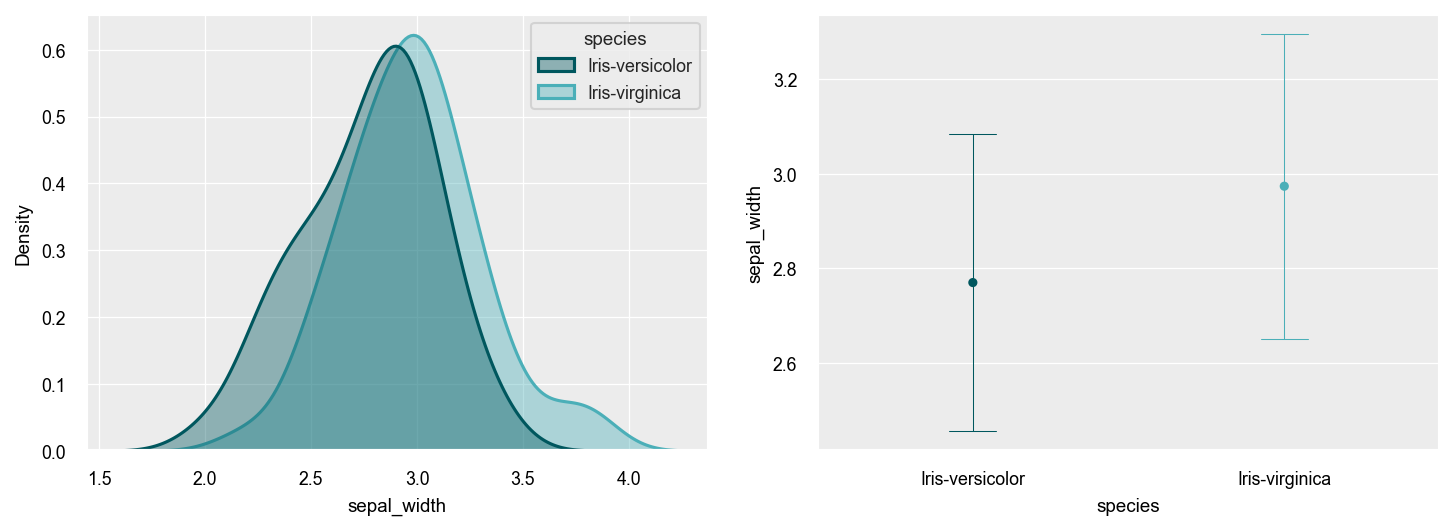

In [31]:
with plt.rc_context(rc={'figure.dpi': 150, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8.5, 'ytick.labelsize': 8.5,
                        'legend.fontsize': 8.5, 'legend.title_fontsize': 9}):

    fig, ax = plt.subplots(2, 2, figsize=(10, 7)) # 2 by 2 grid - making graphs look neater
    
    sns.kdeplot(ax=ax[0, 0], x=df_virg_vers['sepal_width'], hue=df_virg_vers['species'],
                common_norm=True,
                fill=True, alpha=0.4, palette=my_palette_2,
                linewidth=1.5)
    
    sns.pointplot(ax=ax[0, 1], y=df_virg_vers['sepal_width'], x=df_virg_vers['species'],
                  palette=my_palette_2,
                  estimator=np.mean, errorbar='sd', scale=0.5,
                  errwidth=0.5, capsize=0.15, join=False, dodge=True)
    
    ax[1, 0].set_visible(False)
    ax[1, 1].set_visible(False)
    
    plt.tight_layout(pad=1.5)
    plt.show()

## 1. F-test <a class="anchor" id = "III_1"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population variances of 2 groups are equal or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are drawn independently, and the observations are sampled independently of each other;</div>
* <div style = "font-size: 14px">Samples are ~ $N(μ,σ^2)$;</div>
* <div style = "font-size: 14px">$σ_1^2$ and $σ_2^2$ are unknown.</div>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the samples are drawn from populations with the same population variances: $σ_1^2 = σ_2^2$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Disadvantages</b>: F-test is very sensitive to non-normality.</div></p>

In [32]:
F = np.var(df_virginica['sepal_width']) / np.var(df_versicolor['sepal_width'])

# Test (using CDF)

2*(1 - sc.f.cdf(F, len(df_virginica) - 1, len(df_versicolor) - 1))  # two-sided

0.8489880591179964

In [33]:
# Test (using survival function)

2*sc.f.sf(F, len(df_virginica) - 1, len(df_versicolor) - 1)  # two-sided

0.8489880591179927

<div style = "font-size: 14px">Since p-value $>$ $α$, we fail to reject $H_0$. In other words, there is not enough evidence to conclude that $σ_1^2$ and $σ_2^2$ are different. Note, unless you are 100% certain that samples you've collected are normal enough, it is better to opt for other tests that are less sensitive to violations of normality.</div>

## 2. Levene’s test <a class="anchor" id = "III_2"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population variances of 2 groups are equal or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are drawn independently, and the observations are sampled independently of each other;</div>
* <div style = "font-size: 14px">$σ_1^2$ and $σ_2^2$ are unknown.</div>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the samples are drawn from populations with the same population variances: $σ_1^2 = σ_2^2$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

In [34]:
# Skewed (non-normal) distributions

sc.levene(df_virginica['sepal_width'], df_versicolor['sepal_width'], center='mean')

LeveneResult(statistic=0.10457872395141152, pvalue=0.7470917317333748)

In [35]:
# Symmetric, moderate-tailed distributions

sc.levene(df_virginica['sepal_width'], df_versicolor['sepal_width'], center='median')

LeveneResult(statistic=0.08726625111308971, pvalue=0.7683067284841044)

In [36]:
# Heavy-tailed distributions

sc.levene(df_virginica['sepal_width'], df_versicolor['sepal_width'], center='trimmed', proportiontocut=0.05)

LeveneResult(statistic=0.4242912625836691, pvalue=0.5164633323375172)

## 3. Bartlett’s test <a class="anchor" id = "III_3"></a>

<p><div style = "text-align: justify; font-size: 14px"><b>Purpose</b>: test whether the unknown population variances of 2 groups are equal or not.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Requirements</b>:</div></p>

* <div style = "font-size: 14px">Both samples are drawn independently, and the observations are sampled independently of each other;</div>
* <div style = "font-size: 14px">Departures from normality are not too significant;</div>
* <div style = "font-size: 14px">$σ_1^2$ and $σ_2^2$ are unknown.</div>

<p><div style = "text-align: justify; font-size: 14px">$H_0$ – the samples are drawn from populations with the same population variances: $σ_1^2 = σ_2^2$.</div></p>

<p><div style = "text-align: justify; font-size: 14px"><b>Decision</b>: reject $H_0$ if p-value $<$ $α$.</div></p>

In [37]:
sc.bartlett(df_virginica['sepal_width'], df_versicolor['sepal_width'])

BartlettResult(statistic=0.03625769827108699, pvalue=0.848984302311427)